## Food prices in India

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Understanding Data

In [ ]:
data=pd.read_csv('/content/RAW File - ind-food-prices.csv')
data

<ipython-input-68-0b1736185e92>:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/RAW File - ind-food-prices.csv')


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176790,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,94.3,1.1363
176791,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.71,1.3581
176792,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,118.43,1.427
176793,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,vegetables and fruits,Onions,KG,actual,Retail,INR,30.51,0.3676


In [ ]:
data=data.drop(0)

In [ ]:
# checking info for finding any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176794 entries, 1 to 176794
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       176794 non-null  object
 1   admin1     176192 non-null  object
 2   admin2     176192 non-null  object
 3   market     176794 non-null  object
 4   latitude   176192 non-null  object
 5   longitude  176192 non-null  object
 6   category   176794 non-null  object
 7   commodity  176794 non-null  object
 8   unit       176794 non-null  object
 9   priceflag  176794 non-null  object
 10  pricetype  176794 non-null  object
 11  currency   176794 non-null  object
 12  price      176794 non-null  object
 13  usdprice   176794 non-null  object
dtypes: object(14)
memory usage: 18.9+ MB


In [ ]:
data.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

## Data Cleaning

In [ ]:
null=data.isnull().sum() # to get the nan values
print(null[null>0])

admin1       602
admin2       602
latitude     602
longitude    602
dtype: int64


In [ ]:
# filling the admin1 and admin2 with mode since they are qualitative

mode_admin1=data['admin1'].mode()[0]
data['admin1']=data['admin1'].fillna(mode_admin1)

mode_admin2=data['admin2'].mode()[0]
data['admin2']=data['admin2'].fillna(mode_admin2)

In [ ]:
# filling latitude
data['latitude']=data['latitude'].astype(float)
mode_latitude=data['latitude'].mode()[0]
data['latitude']=data['latitude'].fillna(mode_latitude)

#filling longitude
data['longitude']=data['longitude'].astype(float)
mode_longitude=data['longitude'].mode()[0]
data['longitude']=data['longitude'].fillna(mode_longitude)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176794 entries, 1 to 176794
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       176794 non-null  object 
 1   admin1     176794 non-null  object 
 2   admin2     176794 non-null  object 
 3   market     176794 non-null  object 
 4   latitude   176794 non-null  float64
 5   longitude  176794 non-null  float64
 6   category   176794 non-null  object 
 7   commodity  176794 non-null  object 
 8   unit       176794 non-null  object 
 9   priceflag  176794 non-null  object 
 10  pricetype  176794 non-null  object 
 11  currency   176794 non-null  object 
 12  price      176794 non-null  object 
 13  usdprice   176794 non-null  object 
dtypes: float64(2), object(12)
memory usage: 18.9+ MB


## Descriptive Statistics

In [ ]:
data.describe() # why only latitude and longitude

,latitude,longitude
count,176794.000000,176794.000000
mean,22.404669,80.259093
std,6.201493,5.649344
min,8.506944,69.666690
25%,18.866667,76.283333
50%,23.350000,78.157870
75%,26.716111,85.000000
max,32.553589,94.116667


## Feature Engineering

In [ ]:
data['date']=pd.to_datetime(data['date'])

data['Year']=data['date'].dt.year

data['Month']=data['date'].dt.month

data['DayOfWeek']=data['date'].dt.dayofweek

data.drop('date',axis=1,inplace=True)

## Correlation Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['admin1']=le.fit_transform(data['admin1'])
data['admin2']=le.fit_transform(data['admin2'])
data['market']=le.fit_transform(data['market'])
data['commodity']=le.fit_transform(data['commodity'])
data['pricetype']=le.fit_transform(data['pricetype'])

In [ ]:
data['category'].value_counts()

,count
category,
oil and fats,44231
cereals and tubers,39810
miscellaneous food,34711
pulses and nuts,31507
vegetables and fruits,17166
milk and dairy,9369


In [ ]:
# dropping unwanted features

data.drop('priceflag',axis=1,inplace=True)
data.drop('currency',axis=1,inplace=True)
data.drop('usdprice',axis=1,inplace=True)

# replacing

data["unit"].replace(["KG","L","100 KG"],[1,2,3],inplace=True)
data["category"].replace(["oil and fats","cereals and tubers","miscellaneous food","pulses and nuts","vegetables and fruits","milk and dairy"],[1,2,3,4,5,6],inplace=True)

<ipython-input-79-ba16074f61d5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["unit"].replace(["KG","L","100 KG"],[1,2,3],inplace=True)
<ipython-input-79-ba16074f61d5>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["unit"].replace(["KG","L","100 KG"],[1,2,3],inplace=True)
<ipython-inp

In [ ]:
data['price']=data['price'].astype(float)

Text(0.5, 1.0, 'corelation matrix')

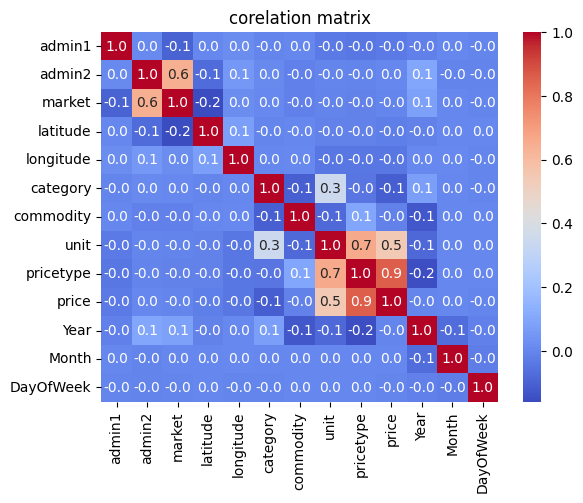

In [ ]:
# correlation matrix

cor=data.corr()

sns.heatmap(cor,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title('corelation matrix')

<Axes: >

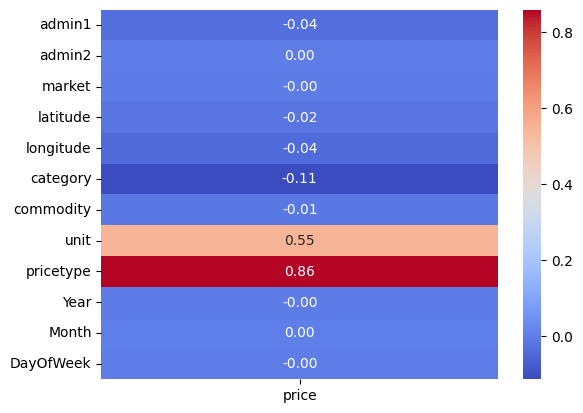

In [ ]:
# corelation between price and other columns

price_cor=data.corr()['price'].drop('price')

sns.heatmap(price_cor.to_frame(),annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
# droping month  and admin2

data.drop('Month',axis=1,inplace=True)
data.drop('admin2',axis=1,inplace=True)

## Outlier Detection

<Axes: >

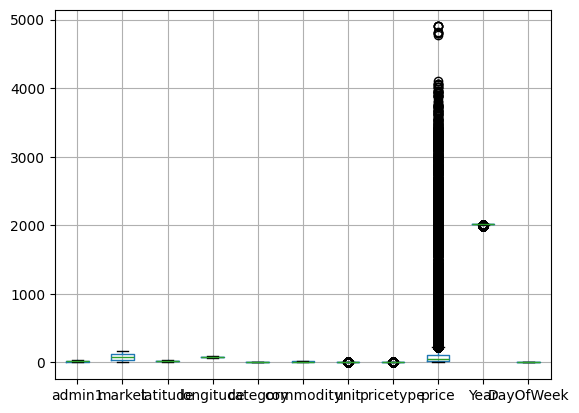

In [ ]:
data.boxplot()

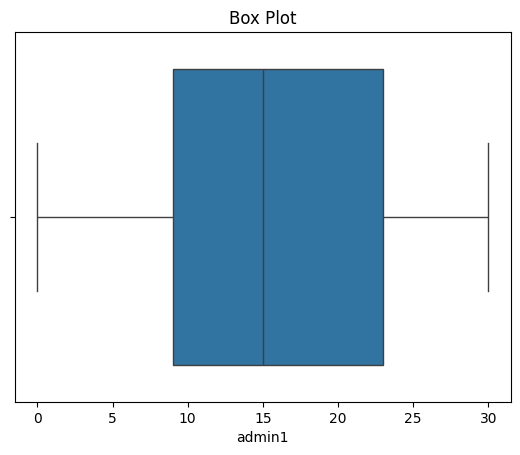

Number of outliers in admin1:0


In [ ]:
#  admin1
sns.boxplot(x=data['admin1'])
plt.title('Box Plot')
plt.show()

from scipy import stats
import numpy as np

z_scores=np.abs(stats.zscore(data['admin1']))
outliers=data[z_scores>3]
print(f'Number of outliers in admin1:{outliers.shape[0]}')

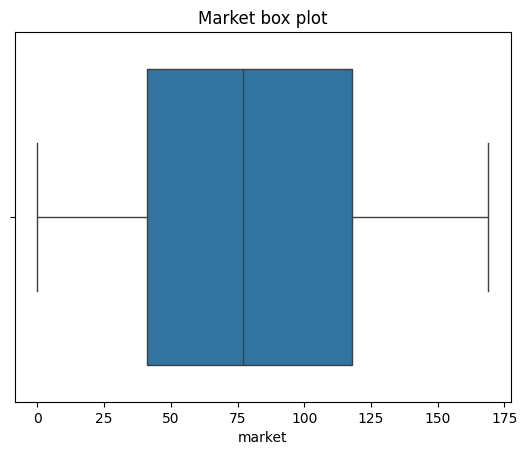

Number of outliers:0


In [ ]:
#  market

sns.boxplot(x=data['market'])
plt.title('Market box plot')
plt.show()

zscores=np.abs(stats.zscore(data['market']))
outliers=data[zscores>3]
print(f"Number of outliers:{outliers.shape[0]}")

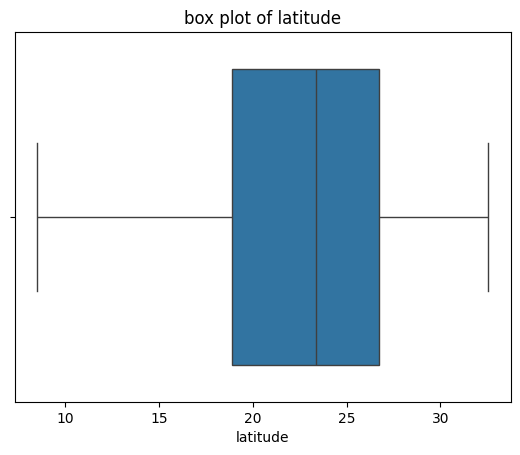

Number of outliers in latitude: 0


In [ ]:
# latitude

sns.boxplot(x=data['latitude'])
plt.title('box plot of latitude')
plt.show()

z_scores=np.abs(stats.zscore(data['latitude']))
outliers=data[z_scores>3]
print(f'Number of outliers in latitude: {outliers.shape[0]}')

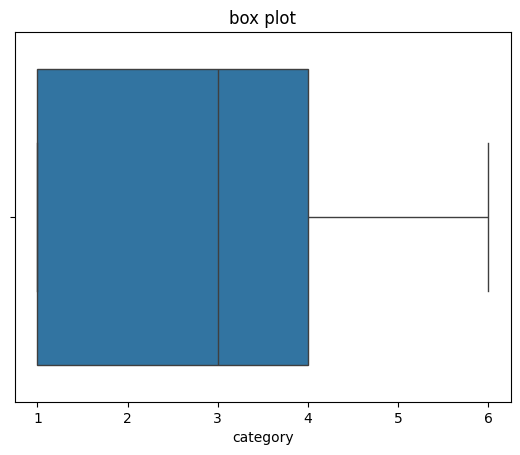

Number of outliers in category:0


In [ ]:
# category
sns.boxplot(x=data['category'])
plt.title('box plot')
plt.show()

z_scores=np.abs(stats.zscore(data['category']))
outliers=data[z_scores > 3]
print(f'Number of outliers in category:{outliers.shape[0]}')

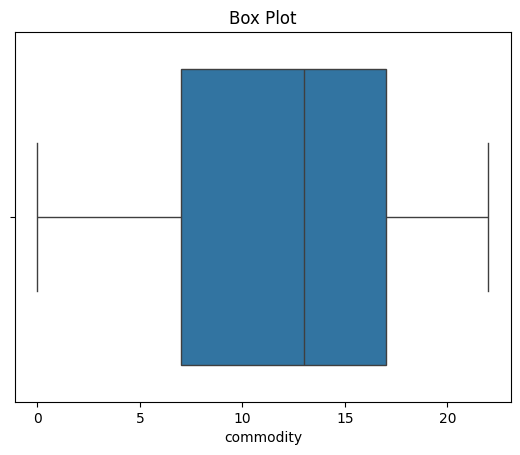

Number of outliers in commodity: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=data['commodity'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data['commodity']))
outliers = data[z_scores > 3]
print(f'Number of outliers in commodity: {outliers.shape[0]}')

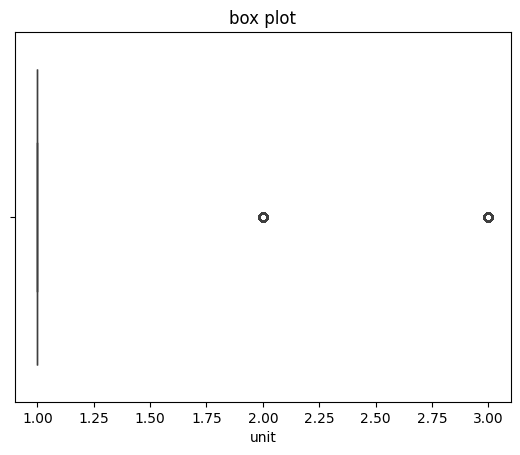

number of outliers:0


In [ ]:
# unit
sns.boxplot(x=data['unit'])
plt.title('box plot')
plt.show()

z_scores=np.abs(stats.zscore(data['unit']))
ouliers=data[z_scores >3]
print(f'number of outliers:{outliers.shape[0]}')

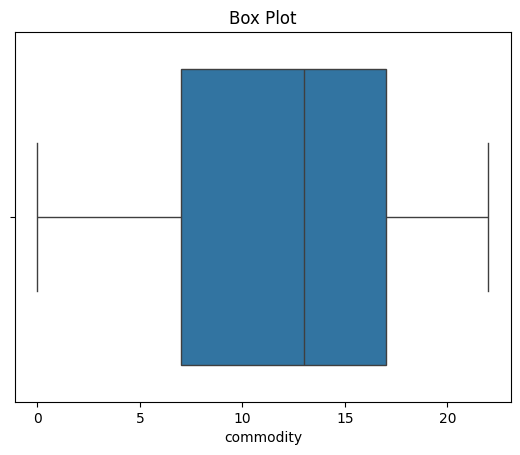

Number of outliers in commodity: 0


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=data['commodity'])
plt.title('Box Plot')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data['commodity']))
outliers = data[z_scores > 3]
print(f'Number of outliers in commodity: {outliers.shape[0]}')

## checking and removing outliers

<Axes: >

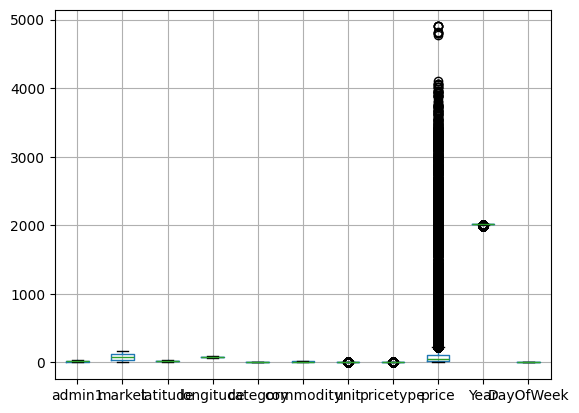

In [ ]:
data.boxplot()

In [ ]:
# removing outliers
def remove_outliers(data,exclude_column):
  for col in data.columns:
    if col==exclude_column:
      continue
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    data=data[(data[col]>=lower_bound)& (data[col]<=upper_bound)]
  return data

data_cleaned=remove_outliers(data,exclude_column='price')
data_cleaned

,admin1,market,latitude,longitude,category,commodity,unit,pricetype,price,Year,DayOfWeek
7600,2,57,26.183333,91.733333,1,9,1,0,50.00,2007,0
7601,3,116,25.600000,85.116667,2,14,1,0,12.00,2007,0
7602,3,116,25.600000,85.116667,2,15,1,0,11.00,2007,0
7604,3,116,25.600000,85.116667,3,17,1,0,20.00,2007,0
7605,3,116,25.600000,85.116667,1,9,1,0,55.00,2007,0
...,...,...,...,...,...,...,...,...,...,...,...
176790,23,111,26.938848,75.800056,4,3,1,0,94.30,2024,3
176791,23,111,26.938848,75.800056,4,4,1,0,112.71,2024,3
176792,23,111,26.938848,75.800056,4,5,1,0,118.43,2024,3
176793,23,111,26.938848,75.800056,5,13,1,0,30.51,2024,3


In [ ]:
df=data_cleaned

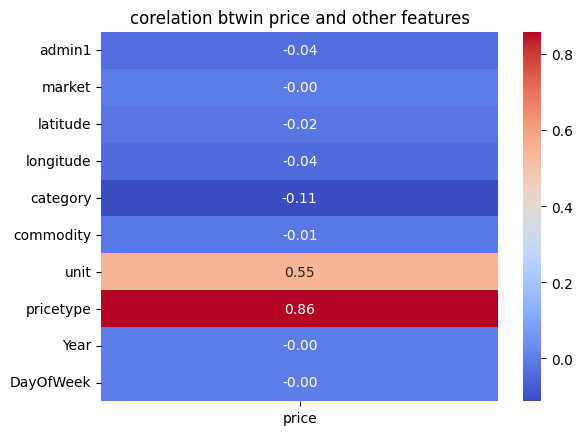

In [ ]:
# calculating corelation after removing outliers

price_cor=data.corr()['price'].drop('price')

sns.heatmap(price_cor.to_frame(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('corelation btwin price and other features')
plt.show()

In [ ]:
df2=df
dfa=df

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['market', 'admin1', 'latitude',"longitude","category","commodity","unit","pricetype","Year","DayOfWeek"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 2944.9056237832383, RMSE: 54.266984657185795, R-squared: 0.24768852777584494


### Dimensionality reduction

In [ ]:
from sklearn.preprocessing import StandardScaler

features=['market','admin1','latitude','longitude','category','commodity','unit','pricetype','Year','DayOfWeek']
scaler=StandardScaler().fit_transform(df[features])

# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(scaler)

# add pca
df['pca1']=pca_result[:,0]
df['pca2']=pca_result[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["pca1","pca2"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 3572.97719672879, RMSE: 59.77438579131358, R-squared: 0.08724010936514082


In [ ]:
# after pca the mse have increased

SyntaxError: invalid syntax (<ipython-input-102-39638814add8>, line 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features=['market','admin1','latitude','longitude','category','commodity','unit','pricetype','Year','DayOfWeek']
scaler=MinMaxScaler()

scaled_data=scaler.fit_transform(df[features])

scaled_df=pd.DataFrame(scaled_data,columns=features,index=df.index)
scaled_df['price']=df['price']
df=scaled_df
df